In [1]:
# for pytorch
import torchvision
import torchvision . transforms as transforms
# Define data transformations ( optional , but recommended )
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5 , 0.5 , 0.5) , (0.5 , 0.5 ,0.5))])
# Load the training dataset If data set is too large to process, you may use portion of it.
train_dataset = torchvision.datasets.CIFAR10(root ='./data ', train = True , transform = transform , download =True )
# Load the testing dataset
test_dataset = torchvision.datasets.CIFAR10 ( root ='./data ', train = False , transform = transform , download =True )
# for keras
from keras . datasets import cifar10
# Load the CIFAR -10 dataset
( train_images , train_labels ) , ( test_images , test_labels ) = cifar10.load_data ()

100%|██████████| 170498071/170498071 [00:02<00:00, 77816976.77it/s]


Extracting ./data /cifar-10-python.tar.gz to ./data 
Files already downloaded and verified
170498071/170498071 [==============================] - 3s 0us/step


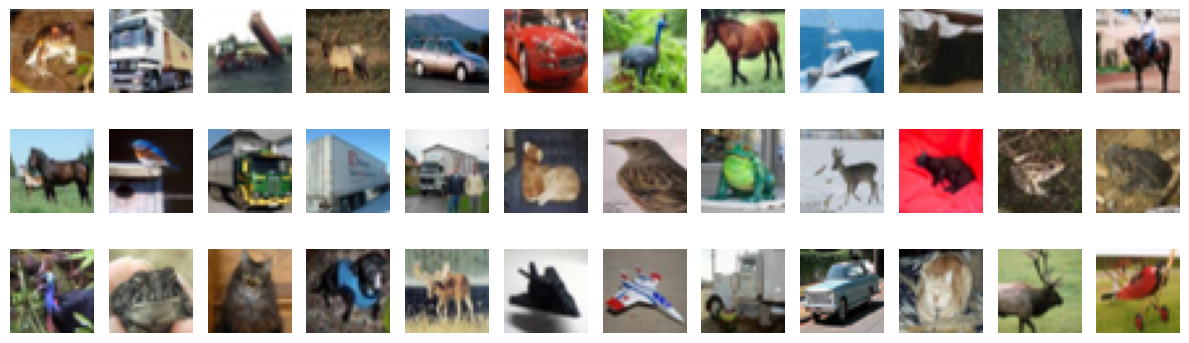

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

num_images_to_display = 36
sample_images = train_images[:num_images_to_display]
sample_labels = train_labels[:num_images_to_display]

def imshow_grid(images, labels):
    plt.figure(figsize=(12, 4))
    for i in range(num_images_to_display):
        plt.subplot(3, 12, i+1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

imshow_grid(sample_images, sample_labels)


# **Our model**

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

train, val, train_y, val_y = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print("Train dataset:", len(train))
print("Validation dataset:", len(val))
print("Test dataset:", len(test_dataset))

Train dataset: 40000
Validation dataset: 10000
Test dataset: 10000


In [4]:
# Normalization
train, val, test_images = train / 255.0, val / 255.0, test_images / 255.0

train_y = to_categorical(train_y, 10)
val_y = to_categorical(val_y, 10)
test_labels = to_categorical(test_labels, 10)

In [5]:
#===========================================   Basic CNN model  ==========================================================#
model = models.Sequential()
model.add(layers.Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

#===========================================================================================================================#

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Training

In [6]:
epochs = 20
history = model.fit(train, train_y, epochs=epochs, batch_size=64, validation_data=(val, val_y))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Epoch 1/20
625/625 [==============================] - 16s 6ms/step - loss: 1.6959 - accuracy: 0.3839 - val_loss: 1.3775 - val_accuracy: 0.5098
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 1.3991 - accuracy: 0.4976 - val_loss: 1.2205 - val_accuracy: 0.5684
Epoch 3/20
625/625 [==============================] - 4s 7ms/step - loss: 1.2795 - accuracy: 0.5448 - val_loss: 1.1357 - val_accuracy: 0.6044
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 1.1874 - accuracy: 0.5789 - val_loss: 1.0769 - val_accuracy: 0.6205
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 1.1186 - accuracy: 0.6065 - val_loss: 1.0388 - val_accuracy: 0.6321
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 1.0583 - accuracy: 0.6259 - val_loss: 1.0148 - val_accuracy: 0.6337
Epoch 7/20
625/625 [==============================] - 4s 7ms/step - loss: 1.0119 - accuracy: 0.6435 - val_loss: 0.9642 - val_accuracy: 0.6620
Epoch

### Predicting

In [7]:
y_pred = model.predict(train)
y_pred_val = model.predict(val)

313/313 [==============================] - 1s 2ms/step


In [8]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

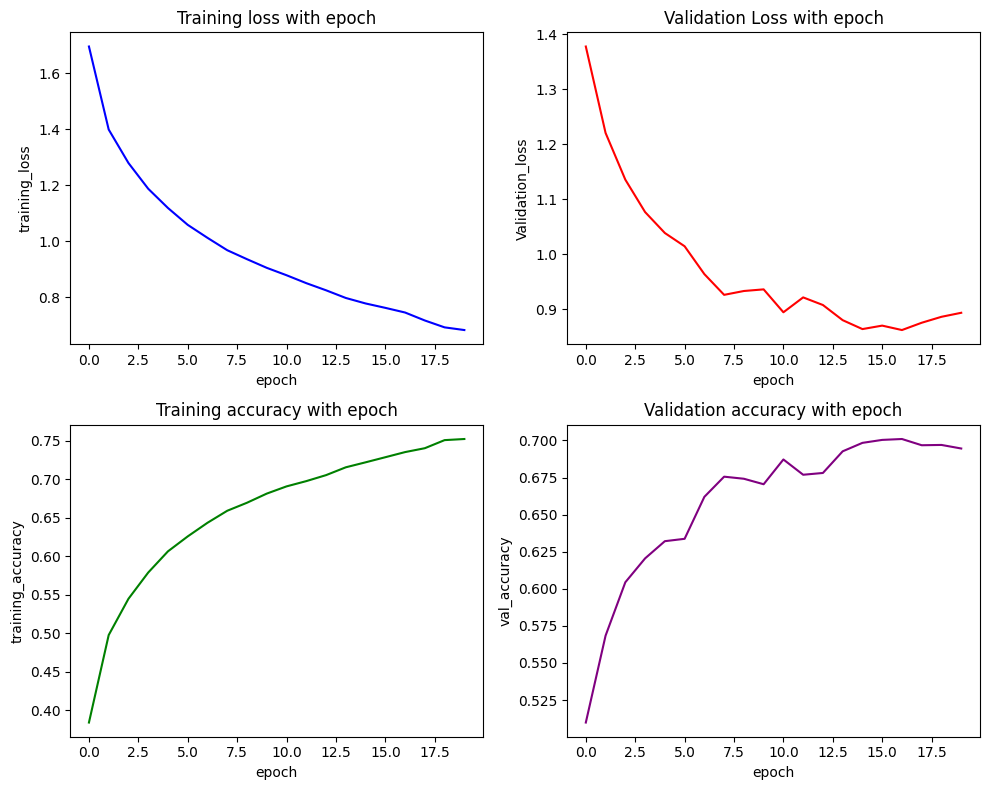

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(training_loss, color='blue')
axs[0, 0].set_title('Training loss with epoch')
axs[0, 0].set_ylabel('training_loss')
axs[0, 0].set_xlabel('epoch')

axs[0, 1].plot(val_loss, color='red')
axs[0, 1].set_title('Validation Loss with epoch')
axs[0, 1].set_ylabel('Validation_loss')
axs[0, 1].set_xlabel('epoch')

axs[1, 0].plot(training_accuracy, color='green')
axs[1, 0].set_title('Training accuracy with epoch')
axs[1, 0].set_ylabel('training_accuracy')
axs[1, 0].set_xlabel('epoch')

axs[1, 1].plot(val_accuracy, color='purple')
axs[1, 1].set_title('Validation accuracy with epoch')
axs[1, 1].set_ylabel('val_accuracy')
axs[1, 1].set_xlabel('epoch')

plt.tight_layout()

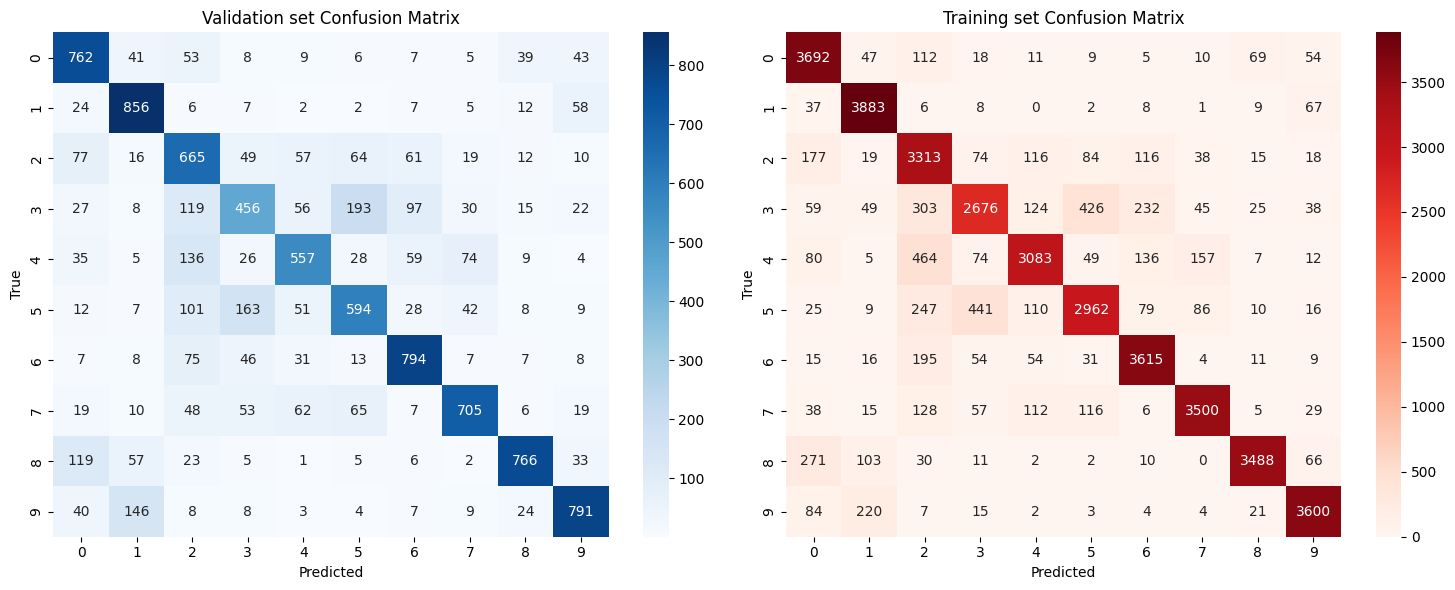

In [10]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true_binary = np.argmax(train_y, axis=1)
y_pred_binary = np.argmax(y_pred, axis=1)

y_true_ = np.argmax(val_y, axis=1)
y_pred_ = np.argmax(y_pred_val, axis=1)

cm_multi = confusion_matrix(y_true_, y_pred_)
cm_binary = confusion_matrix(y_true_binary, y_pred_binary)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true_), yticklabels=np.unique(y_true_), ax=axes[0])
axes[0].set_title('Validation set Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_true_binary), yticklabels=np.unique(y_true_binary), ax=axes[1])
axes[1].set_title('Training set Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()
